In [1]:
import pandas as pd
import numpy as np
import re

raw_df = pd.read_json(r'C:\Users\ogzpython\Desktop\ml\blogpost\scrapy\airbnb\airbnb\spiders\airbnb_data_v2.json')


In [2]:
Clean_Df = raw_df.copy()


Clean_Df

## starting cleaning process with converting currency to integer

In [3]:
Clean_Df = Clean_Df[Clean_Df['night_price'].str.len() != 0]
convert_price = lambda element : element[0].replace('$','')
Clean_Df['night_price'] = Clean_Df['night_price'].apply(convert_price)
Clean_Df['night_price'] = Clean_Df['night_price'].astype('int64')

## Due to webscraping lots of data was in bad format. These functions created to seperate the scraped data. Functions are named to be easly understand


In [4]:
def regex_area(x):
    location_regex =re.compile(r'(in\s)(\w+)')
    mo = location_regex.findall(x)
    result = mo[-1][-1]
    return result
Clean_Df['area'] = Clean_Df['type_of_room'].apply(regex_area)

In [5]:
def regex_room_type(x):
    type_regex = re.compile(r'boutique\shotel|aparthotel|Camper/RV|Entire serviced apartment|Boat|Casa\sparticular|Entire\sapartment|Entire\sbed\sand\sbreakfast|Entire\scondominium|Entire\sguest\ssuite|Entire\sguesthouse|Entire\shouse|Entire loft|Entire place|Entire serviced apartment|Entire\stownhouse|Entire\svilla|Hostel\sbeds|Hostel\sroom|Private\sroom|Room\sin\saparthotel|Room\sin\sboutique\shotel|Room\sin\sserviced\sapartment|Shared\sroom|Tiny\shouse|Yurt|Hotel|Beds in serviced apartment|Earth house') 
    result = type_regex.findall(x)
    try :
        return result[0]
    except:
        return 'error'
Clean_Df['room type'] = Clean_Df['type_of_room'].apply(regex_room_type)

In [6]:
Clean_Df['additionnal_info_string'] = [','.join(map(str,i)) for i in Clean_Df['additionnal_info']]

In [7]:
def regex_guest_num(x):
    regex=re.compile(r'(\d+) (gues\w+)')
    result = regex.findall(x)
    return int(result[0][0])
Clean_Df['guest_num'] = Clean_Df['additionnal_info_string'].apply(regex_guest_num)

In [8]:
def regex_bedroom_num(x):
    regex=re.compile(r'(,)(\d+)\s(bedr\w+)')
    result = regex.findall(x)
   
    try:
        return int(result[0][1])
    except:
        return int(1)
Clean_Df['bedroom_num'] = Clean_Df['additionnal_info_string'].apply(regex_bedroom_num)

In [9]:
def regex_bed_num(x):
    regex=re.compile(r'(,)(\d+)\s(beds)')
    result = regex.findall(x)
   
    try:
        return int(result[0][1])
    except:
        return int(1)
Clean_Df['bed_num'] = Clean_Df['additionnal_info_string'].apply(regex_bed_num)

In [10]:
def regex_bath_num(x):
    regex=re.compile(r'(,)(\d+)(\s\w+)?\s(bath)')
    result = regex.findall(x)
   
    try:
        return int(result[0][1])
    except:
        return int(1)
Clean_Df['bath_num'] = Clean_Df['additionnal_info_string'].apply(regex_bath_num)

In [11]:
def regex_bath_type(x):
    regex=re.compile(r'(,)(\d+)(\s\w+)?\s(bath)')
    result = regex.findall(x)
   
    try:
        return str(result[0][2])
    except:
        return ''
Clean_Df['bath_type'] = Clean_Df['additionnal_info_string'].apply(regex_bath_type)

In [12]:
def regex_wifi(x):
    regex=re.compile(r'Wifi')
    result = regex.findall(x)
   
    try:
        return str(result[0])
    except:
        return 'No Wifi'
Clean_Df['wifi'] = Clean_Df['additionnal_info_string'].apply(regex_wifi)

In [13]:
def regex_Kitchen(x):
    regex=re.compile(r'Kitchen')
    result = regex.findall(x)
   
    try:
        return str(result[0])
    except:
        return 'No Kitchen'
Clean_Df['Kitchen'] = Clean_Df['additionnal_info_string'].apply(regex_Kitchen)

In [14]:
def regex_Heating(x):
    regex=re.compile(r'Heating')
    result = regex.findall(x)
   
    try:
        return str(result[0])
    except:
        return 'No Heating'
Clean_Df['Heating'] = Clean_Df['additionnal_info_string'].apply(regex_Heating)

In [15]:
def regex_Washer(x):
    regex=re.compile(r'Washer')
    result = regex.findall(x)
   
    try:
        return str(result[0])
    except:
        return 'No Washer'
Clean_Df['Washer'] = Clean_Df['additionnal_info_string'].apply(regex_Washer)

In [16]:
Clean_Df['nb_comment_string'] = [', '.join(map(str,i)) for i in Clean_Df['nb_comment']]

In [17]:
def regex_num_reviews(x):
    regex=re.compile(r'\d+')
    result = regex.findall(x)
   
    try:
        return int(result[0])
    except:
        return int(0)
Clean_Df['review_num'] = Clean_Df['nb_comment_string'].apply(regex_num_reviews)

## after seperating the data to a better format started to second phase of cleaning

In [18]:
GoodStuff= ['night_price','rating','review_num','superhost','area','room type','guest_num','bedroom_num','bed_num','bath_num','bath_type','wifi','Kitchen','Heating','Washer']

In [19]:
Cleanest_df = Clean_Df[GoodStuff].copy()

In [20]:
Cleanest_df

,night_price,rating,review_num,superhost,area,room type,guest_num,bedroom_num,bed_num,bath_num,bath_type,wifi,Kitchen,Heating,Washer
0,51,4.57,14,False,Sultanahmet,Room in boutique hotel,2,1,1,1,private,Wifi,No Kitchen,Heating,No Washer
1,48,4.67,27,False,Sultanahmet,Entire loft,2,1,1,1,,Wifi,Kitchen,Heating,Washer
2,52,4.71,17,True,Sultanahmet,Room in aparthotel,3,1,2,1,private,Wifi,Kitchen,Heating,No Washer
3,48,NaN,0,True,Sultanahmet,Hotel,2,1,1,1,private,Wifi,Kitchen,Heating,Washer
4,53,4.33,12,False,Fatih,Entire apartment,5,3,5,1,,Wifi,Kitchen,Heating,Washer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23199,84,NaN,0,False,Karaköy,Entire apartment,2,1,1,1,,Wifi,Kitchen,Heating,Washer
23200,92,NaN,0,False,Cihangir,Room in boutique hotel,2,1,1,1,private,Wifi,No Kitchen,Heating,No Washer
23201,85,NaN,0,False,Cihangir,Room in serviced apartment,4,2,2,1,,Wifi,Kitchen,Heating,Washer
23202,78,NaN,0,False,Cihangir,Room in boutique hotel,5,1,3,1,private,Wifi,No Kitchen,Heating,No Washer


In [21]:
Cleanest_df.drop_duplicates(inplace=True) ## webscraping caused lots of duplicates

In [22]:
Cleanest_df['bath_type'] = Cleanest_df['bath_type'].apply(lambda x: ' private' if x == '' else x) 

# only null values were with ratings so they are imputed to mean values. 

In [23]:
Cleanest_df['rating'] = Cleanest_df['rating'].fillna(Cleanest_df['rating'].mean()) 

In [24]:
Cleanest_df.dtypes

night_price      int64
rating         float64
review_num       int64
superhost         bool
area            object
room type       object
guest_num        int64
bedroom_num      int64
bed_num          int64
bath_num         int64
bath_type       object
wifi            object
Kitchen         object
Heating         object
Washer          object
dtype: object

In [25]:
Cleanest_df['area'] = Cleanest_df['area'].astype('category')
Cleanest_df['room type'] = Cleanest_df['room type'].astype('category')
Cleanest_df['wifi'] = Cleanest_df['wifi'].astype('category')
Cleanest_df['Kitchen'] = Cleanest_df['Kitchen'].astype('category')
Cleanest_df['Heating'] = Cleanest_df['Heating'].astype('category')
Cleanest_df['Washer'] = Cleanest_df['Washer'].astype('category')
Cleanest_df['bath_type'] = Cleanest_df['bath_type'].astype('category')

In [51]:
Cleanest_df.dtypes

night_price       int64
rating          float64
review_num        int64
superhost          bool
area           category
room type      category
guest_num         int64
bedroom_num       int64
bed_num           int64
bath_num          int64
bath_type      category
wifi           category
Kitchen        category
Heating        category
Washer         category
dtype: object

In [27]:
Cleanest_df = Cleanest_df[Cleanest_df['bed_num']<6]

In [28]:
Cleanest_df = Cleanest_df[Cleanest_df['bedroom_num']<6]

In [29]:
Cleanest_df = Cleanest_df[Cleanest_df['guest_num']<13]

# due to mistakes of airbnb hosts some features had illogical values or some houses are out of scope irregular houses so they are ignored. 

In [30]:
Cleanest_df.describe().T

,count,mean,std,min,25%,50%,75%,max
night_price,7338.0,42.222540,23.467956,5.0,24.00000,37.00000,60.00,100.0
rating,7338.0,4.625587,0.250546,1.5,4.62534,4.62534,4.64,5.0
review_num,7338.0,11.619787,30.207463,0.0,0.00000,0.00000,9.00,354.0
guest_num,7338.0,2.869447,1.424533,1.0,2.00000,2.00000,4.00,12.0
bedroom_num,7338.0,1.230172,0.515567,1.0,1.00000,1.00000,1.00,5.0
bed_num,7338.0,1.679613,1.032112,0.0,1.00000,1.00000,2.00,5.0
bath_num,7338.0,1.047016,0.285676,0.0,1.00000,1.00000,1.00,7.0


In [31]:
Cleanest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7338 entries, 0 to 23175
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   night_price  7338 non-null   int64   
 1   rating       7338 non-null   float64 
 2   review_num   7338 non-null   int64   
 3   superhost    7338 non-null   bool    
 4   area         7338 non-null   category
 5   room type    7338 non-null   category
 6   guest_num    7338 non-null   int64   
 7   bedroom_num  7338 non-null   int64   
 8   bed_num      7338 non-null   int64   
 9   bath_num     7338 non-null   int64   
 10  bath_type    7338 non-null   category
 11  wifi         7338 non-null   category
 12  Kitchen      7338 non-null   category
 13  Heating      7338 non-null   category
 14  Washer       7338 non-null   category
dtypes: bool(1), category(7), float64(1), int64(6)
memory usage: 518.6 KB


In [32]:
cat_df = Cleanest_df.select_dtypes(include=['category','bool'])

In [33]:
numerics_df = Cleanest_df.select_dtypes(exclude=['category','bool'])

# Exploratory Data Analysis

# Business Understanding and Data Understanding

## Q1: how is the disribution of prices?
## Q2: are there any correlation?
## Q3: what are the categories and numerics?

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

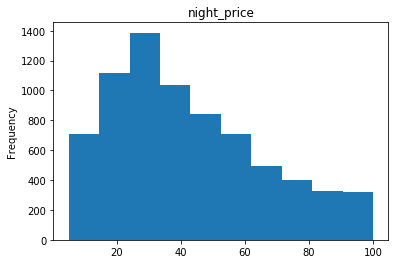

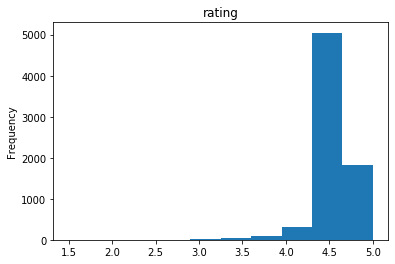

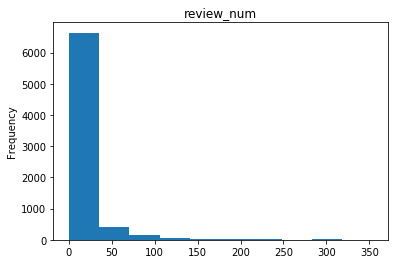

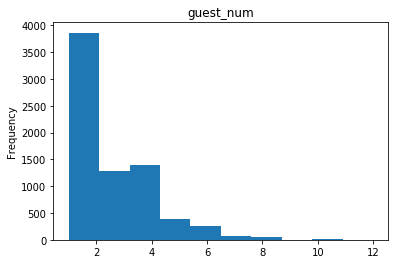

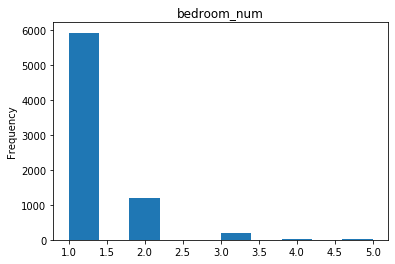

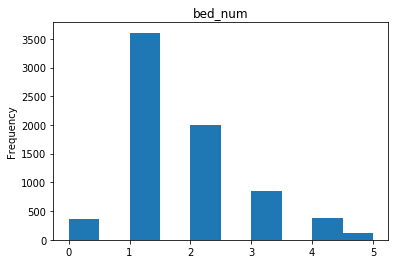

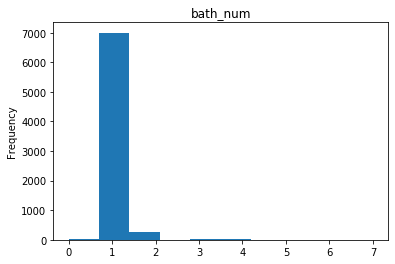

In [35]:
for cols in numerics_df:
    plt.figure(cols)
    plt.title(cols)
    numerics_df[cols].plot(kind = 'hist')
    

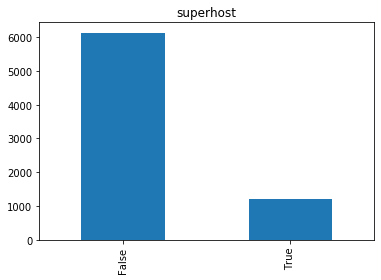

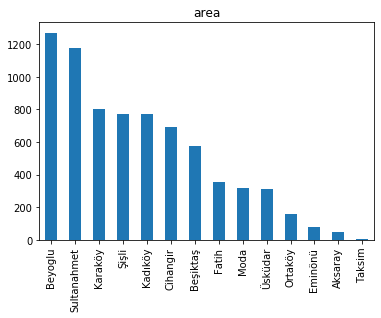

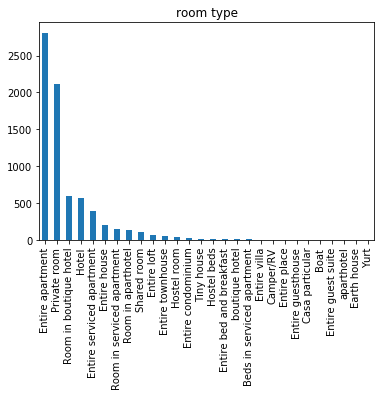

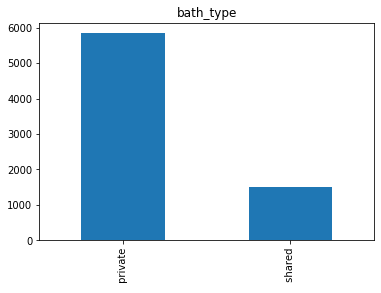

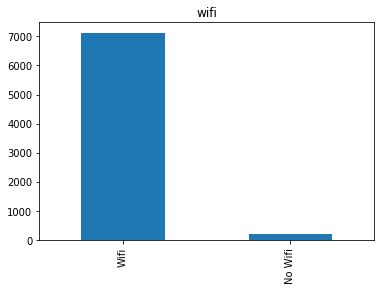

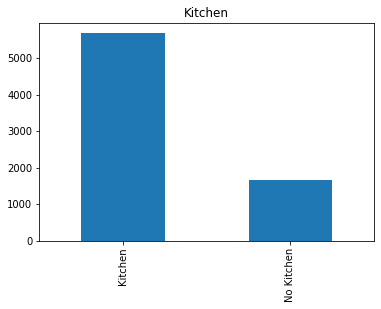

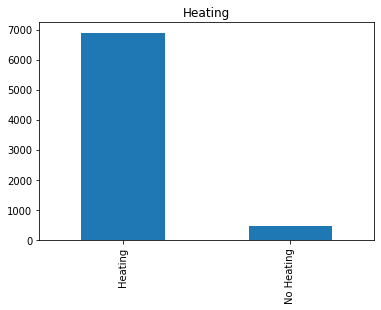

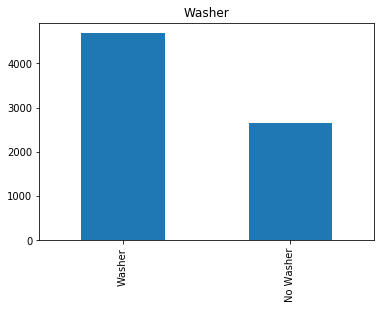

In [36]:
for cols in cat_df:
    plt.figure(cols)
    plt.title(cols)
    cat_df[cols].value_counts().plot(kind = 'bar')

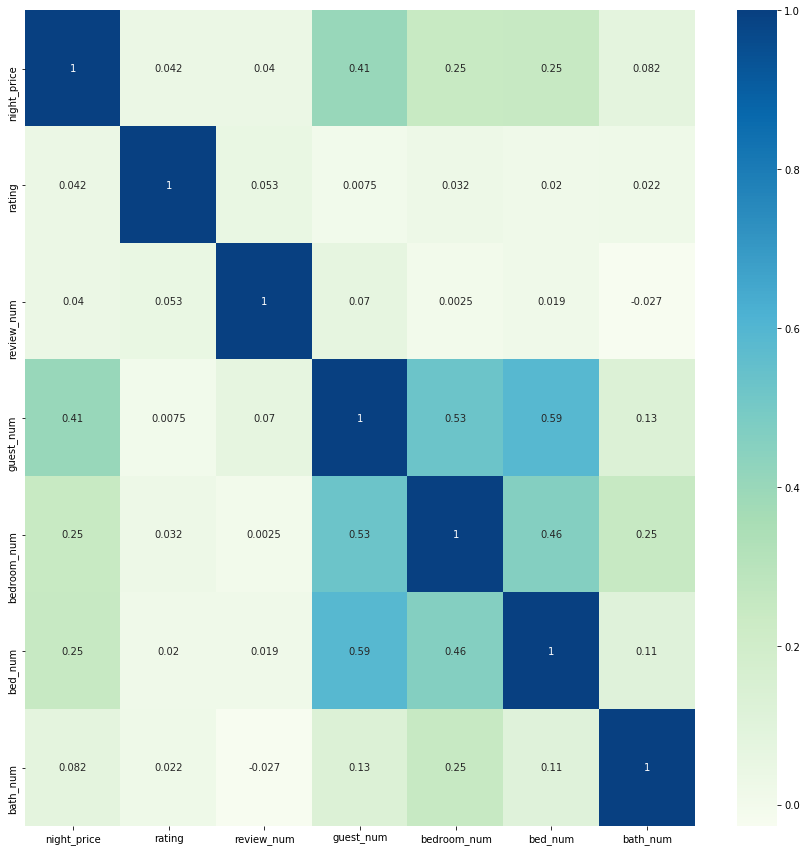

In [37]:
correlation = numerics_df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation,cmap='GnBu',annot = True)

# we dont have strong corr

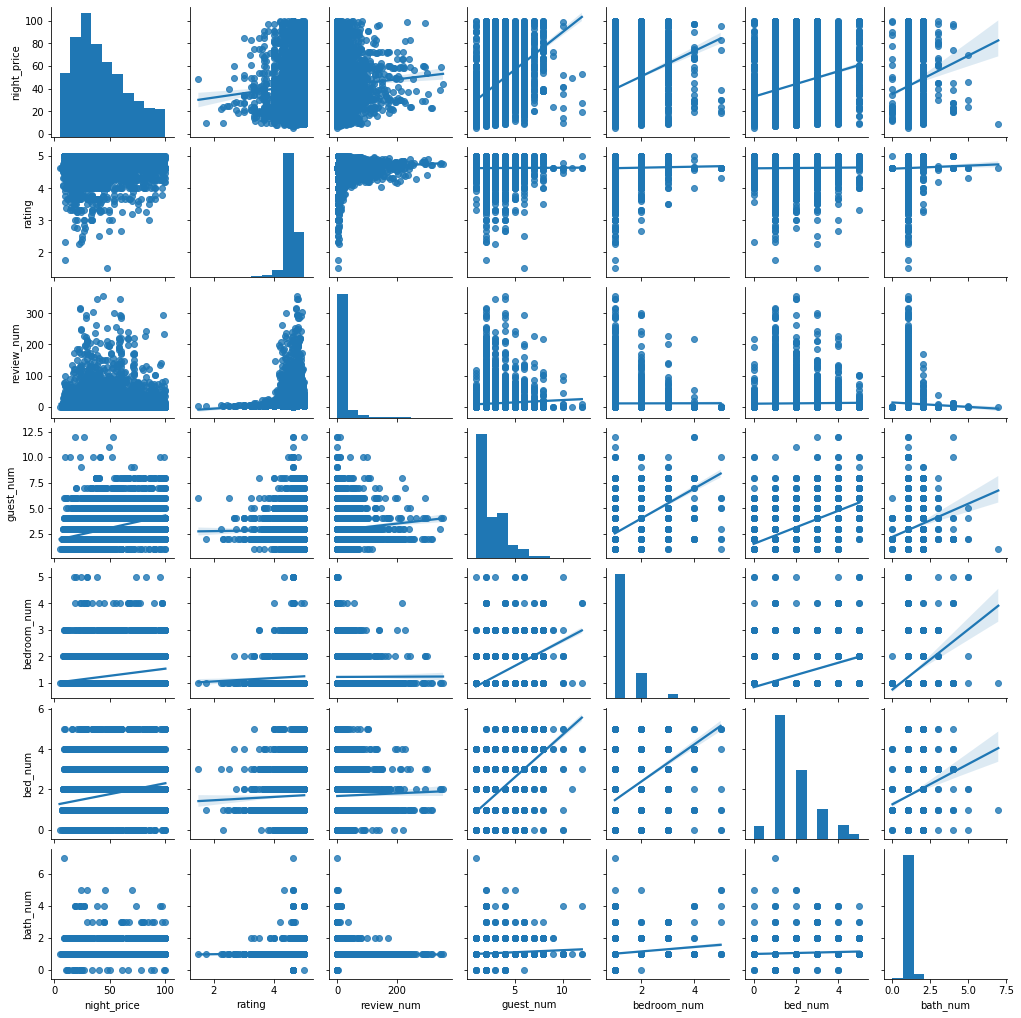

In [38]:
sns.pairplot(numerics_df,height = 2,kind ='reg')

# Prepare Data

## One Hot Transformation of Cats

In [39]:
cat_cols = Cleanest_df.select_dtypes(include=['category','bool']).columns
cat_cols

Index(['superhost', 'area', 'room type', 'bath_type', 'wifi', 'Kitchen',
       'Heating', 'Washer'],
      dtype='object')

In [40]:
regres_df = pd.get_dummies(Cleanest_df, prefix = cat_cols, columns =cat_cols, drop_first = True )

# Data Modeling: Regression

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
X= regres_df.drop('night_price',axis = 1)
y = regres_df['night_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state =42)

In [43]:
lm = LinearRegression(normalize = True)
model = lm.fit(X_train,y_train)

In [44]:
y_test_preds = lm.predict(X_test)
y_train_preds = lm.predict(X_train)

In [45]:
test_score = r2_score(y_test,y_test_preds)
train_score =r2_score(y_train,y_train_preds)
print('test score: '+str(test_score)+'train score: '+ str(train_score) )

test score: 0.3045679601484582train score: 0.30291904634885936


# we have 30% rsquared. It is low but it was expected since there are a lot of more features affect the prices such as global pandemic :(

In [46]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


# Evaluate the Results

## we have low Rsquered but following graph also confirms that we got more room fore more features!

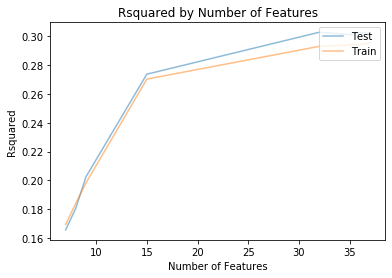

In [47]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

# Since we normalized during regression so higher coefficients means higher impact on price

In [78]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df


coef_df = coef_weights(lm_model.coef_, X_train)
coef_df

,est_int,coefs,abs_coefs
27,bath_type_ shared,-11.991842,11.991842
26,room type_Shared room,-7.903596,7.903596
25,room type_Room in serviced apartment,-7.793724,7.793724
10,area_Fatih,-7.141130,7.141130
7,area_Beyoglu,-6.852255,6.852255
11,area_Kadıköy,-6.712309,6.712309
16,area_Üsküdar,-6.372002,6.372002
0,rating,6.322504,6.322504
12,area_Karaköy,5.789143,5.789143
2,guest_num,4.455028,4.455028


# Question: How relevant is area?

In [70]:

coef_df.set_index('est_int').filter(like='area',axis = 0)

,coefs,abs_coefs
est_int,,
area_Karaköy,5.789143,5.789143
area_Sultanahmet,2.529442,2.529442
area_Cihangir,-0.054173,0.054173
area_Beşiktaş,-0.698613,0.698613
area_Şişli,-0.879148,0.879148
area_Ortaköy,-2.476334,2.476334
area_Moda,-3.861371,3.861371
area_Üsküdar,-6.372002,6.372002
area_Kadıköy,-6.712309,6.712309


# Question: How relevant is room type?

In [71]:
coef_df.set_index('est_int').filter(like='room type',axis = 0)

,coefs,abs_coefs
est_int,,
room type_Hotel,1.336507,1.336507
room type_Entire serviced apartment,0.281517,0.281517
room type_Entire apartment,-0.126798,0.126798
room type_Entire house,-1.670042,1.670042
room type_Room in boutique hotel,-1.684581,1.684581
room type_Room in aparthotel,-3.197061,3.197061
room type_Private room,-4.303606,4.303606
room type_Room in serviced apartment,-7.793724,7.793724
room type_Shared room,-7.903596,7.903596


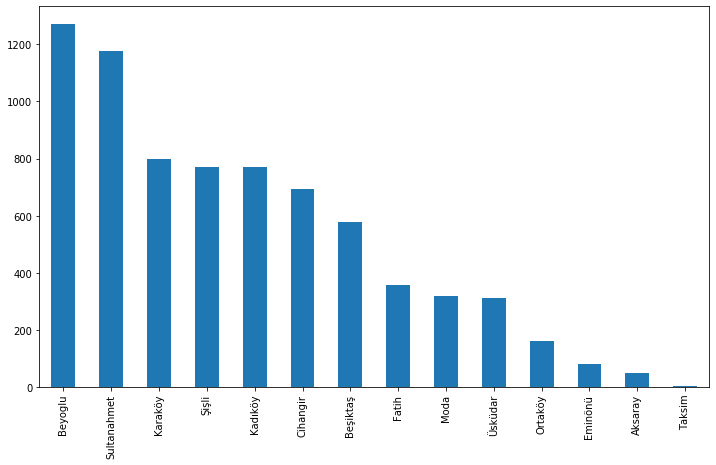

In [77]:
 plt.figure(figsize = (12,7))
cat_df['area'].value_counts().plot(kind = 'bar')